In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install -q keras
#!pip install --upgrade -q tensorflow

In [ ]:
# !pip install keras==2.4.3
# !pip install tensorflow==2.4.1

In [ ]:
# For Weights and Biases
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
# from tensorflow import keras 
import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.4.1


In [ ]:
!pip install bert-for-tf2 >> /dev/null
!pip install sentencepiece >> /dev/null
#!pip install git+https://github.com/KingsleyNA/NLP-on-a-ktrain
!pip install keras-self-attention



!pip install --upgrade grpcio >> /dev/null
!pip install tqdm  >> /dev/null

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.47.0 which is incompatible.


In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
#import ktrain
#from ktrain import text as txt

from keras_self_attention import SeqSelfAttention

import numpy as np
import os
import sys

import wave
import copy
import math

# import keras
from tensorflow import keras 

from tensorflow.keras.models import Sequential, Model
# from keras.layers.core import Dense, Activation
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import GRU, LSTM, Input, Flatten, Concatenate, Embedding, Convolution1D, Dropout, Bidirectional, Conv2D, MaxPooling2D
# from keras.layers.wrappers import TimeDistributed
from tensorflow.python.keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import label_binarize
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import *




import tensorflow as tf



In [ ]:
import wandb
from wandb.keras import WandbCallback

# Login to W&B
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/FINAL_THESIS_PROJECT/codes

/content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes


In [ ]:
from features import *
from helper import *

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
code_path = "/content/drive/MyDrive/Colab_Notebooks/FINAL_THESIS_PROJECT/data"
emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
data_path = code_path + "/"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000

In [ ]:
import pickle
with open(data_path + '/'+'data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [ ]:
text = []

for ses_mod in data2:
    text.append(ses_mod['transcription'])

reviews = []

for i in text:
    reviews.append(i)
    
len(reviews)

4936

In [ ]:
Y=[]
for ses_mod in data2:
    Y.append(ses_mod['emotion'])
    
#Y = label_binarize(Y,emotions_used)

#Y.shape
#type(Y)
Y[0], Y[1], Y[2], Y[3], Y[4]

('neu', 'neu', 'neu', 'neu', 'ang')

In [ ]:
# Y=[]
# for ses_mod in data2:
#   if ses_mod['emotion'] == 'neu':
#     Y.append(0)
#   elif ses_mod['emotion'] == 'ang':
#     Y.append(1)
#   elif ses_mod['emotion'] == 'exc':
#     Y.append(2)
#   elif ses_mod['emotion'] == 'sad':
#     Y.append(3)

# Y = np.array(Y)
# print(type(Y))
# Y[0],Y[1], Y[2]

In [ ]:
x_train = reviews[:3838]
x_test = reviews[3838:]
y_train = Y[:3838]
y_test = Y[3838:]

In [ ]:
train = pd.DataFrame(
    {'review': x_train,
     'emotion': y_train
    })

test = pd.DataFrame(
    {'review': x_test,
     'emotion': y_test
    })

In [ ]:
train.head()

,review,emotion
0,Excuse me.,neu
1,Yeah.,neu
2,Is there a problem?,neu
3,Well what's the problem? Let me change it.,neu
4,That's out of control.,ang


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


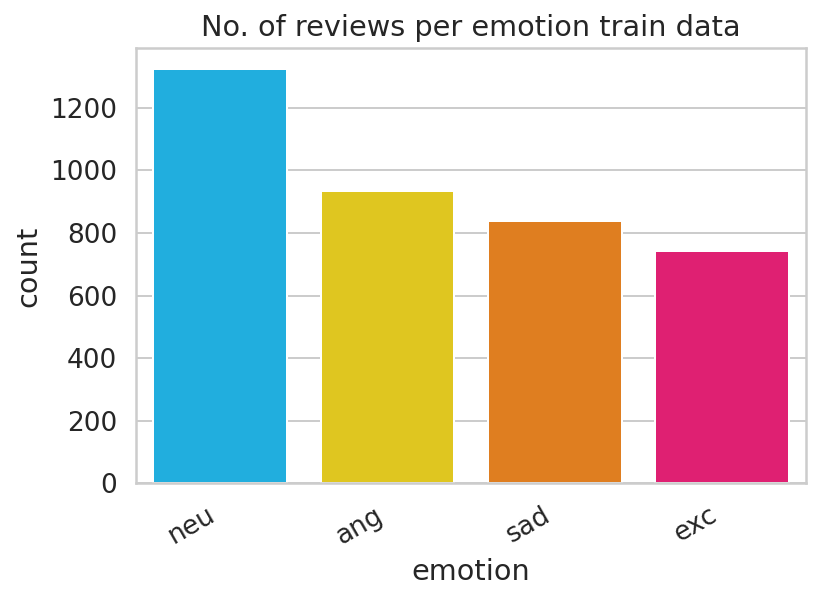

In [ ]:
chart = sns.countplot(train.emotion, palette=HAPPY_COLORS_PALETTE)
plt.title("No. of reviews per emotion train data")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


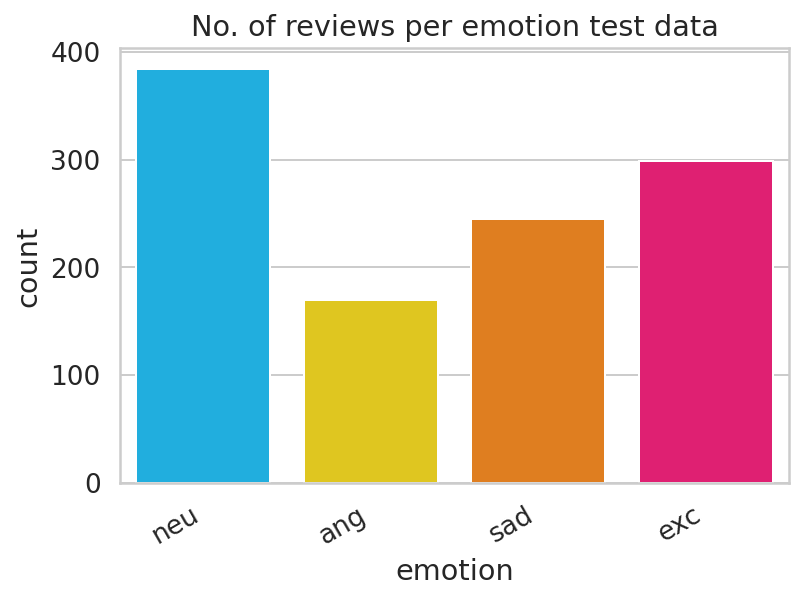

In [ ]:
chart = sns.countplot(test.emotion, palette=HAPPY_COLORS_PALETTE)
plt.title("No. of reviews per emotion test data")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:
#!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_pplH-768_A-12.zip

In [ ]:
#!unzip uncased_L-12_H-768_A-12.zip

In [ ]:
#os.makedirs("model", exist_ok=True)

In [ ]:
#!mv uncased_L-12_H-768_A-12/ model

In [ ]:
bert_model_name="uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

#**Preprocessing**

In [ ]:
class IntentDetectionData:
  DATA_COLUMN = "review"
  LABEL_COLUMN = "emotion"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[IntentDetectionData.DATA_COLUMN], row[IntentDetectionData.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)

In [ ]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))

In [ ]:
tokenizer.tokenize("I can't wait to visit Bulgaria again!")

['i', 'can', "'", 't', 'wait', 'to', 'visit', 'bulgaria', 'again', '!']

In [ ]:
tokens = tokenizer.tokenize("I can't wait to visit Bulgaria again!")
tokenizer.convert_tokens_to_ids(tokens)

[1045, 2064, 1005, 1056, 3524, 2000, 3942, 8063, 2153, 999]

In [ ]:
def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=256, activation="relu")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  load_stock_weights(bert, bert_ckpt_file)
        
  return model

#**Training**

In [ ]:
classes = train.emotion.unique().tolist()

data = IntentDetectionData(train, test, tokenizer, classes, max_seq_len=128)

3838it [00:01, 3046.11it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
1098it [00:00, 2902.86it/s]


max seq_len 124


In [ ]:
data.train_x.shape
data.test_x.shape

(1098, 124)

In [ ]:
data.train_x[0]
data.test_x[0]

array([ 101, 7632, 1010, 1045, 2342, 2019, 8909, 1012,  102,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [ ]:
data.train_y[0]
data.test_y[0]

0

In [ ]:
data.max_seq_len
print(type(data.max_seq_len))

<class 'int'>


In [ ]:
# !pip install tensorflow==2.0.0

In [ ]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 124, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7f78e7f901d0> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 124)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 124, 768)          108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028  

In [ ]:
#  "loss_function": "sparse_categorical_crossentropy(from_logits=True)",
#  "metrics": [keras.metrics.SparseCategoricalAccuracy(name="acc")]

# Initialize wandb with project
run = wandb.init(project ='wav2vec_TextBERT_II', 
                 config={ #. include hyperparmeters and metadat
                         "learning_rate": 1e-5,
                         "epochs": 100,
                         "batch_size": 32,
                         "loss_fn": "sparse_categorical_crossentropy",
                         "architecture": "BERT",
                         "dataset": "IEMOCAP",
                         "metrics":  ["acc"]                         
}) 

config = wandb.config  # We'll use this to configure our experiment

wandb: Currently logged in as: ruddy (team_fazzy). Use `wandb login --relogin` to force relogin


In [ ]:
optimizer=keras.optimizers.Adam(config.learning_rate)
model.compile(optimizer, config.loss_fn, 
              config.metrics)

In [ ]:
history = model.fit(x=data.train_x, y=data.train_y, 
                 batch_size=config.batch_size, epochs=config.epochs, verbose=1, shuffle = True,
                 validation_data= ([data.test_x], [data.test_y]), callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
Epoch 1/100
120/120 [==============================] - 97s 648ms/step - loss: 1.4702 - acc: 0.2943 - val_loss: 1.3776 - val_acc: 0.3497
INFO:tensorflow:Assets written to: /content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best/assets


wandb: Adding directory to artifact (/content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best)... Done. 9.3s


Epoch 2/100
120/120 [==============================] - 75s 629ms/step - loss: 1.4080 - acc: 0.2917 - val_loss: 1.3167 - val_acc: 0.3989
INFO:tensorflow:Assets written to: /content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best/assets


wandb: Adding directory to artifact (/content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best)... Done. 8.9s


Epoch 3/100
120/120 [==============================] - 75s 626ms/step - loss: 1.3277 - acc: 0.3774 - val_loss: 1.0633 - val_acc: 0.5692
INFO:tensorflow:Assets written to: /content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best/assets


wandb: Adding directory to artifact (/content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best)... Done. 8.8s


Epoch 4/100
120/120 [==============================] - 76s 631ms/step - loss: 1.0771 - acc: 0.5580 - val_loss: 0.9604 - val_acc: 0.5993
INFO:tensorflow:Assets written to: /content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best/assets


wandb: Adding directory to artifact (/content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best)... Done. 8.8s


Epoch 5/100
120/120 [==============================] - 75s 624ms/step - loss: 0.8215 - acc: 0.6831 - val_loss: 0.9067 - val_acc: 0.6494
INFO:tensorflow:Assets written to: /content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best/assets


wandb: Adding directory to artifact (/content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best)... Done. 8.8s


Epoch 6/100
120/120 [==============================] - 75s 627ms/step - loss: 0.6693 - acc: 0.7431 - val_loss: 0.8952 - val_acc: 0.6630
INFO:tensorflow:Assets written to: /content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best/assets


wandb: Adding directory to artifact (/content/drive/.shortcut-targets-by-id/1-TsISowGVH-c2pg1SMS88BRnBWd9B3c0/FINAL_THESIS_PROJECT/codes/wandb/run-20220805_140744-23wtoi1q/files/model-best)... Done. 8.9s


Epoch 7/100
120/120 [==============================] - 75s 627ms/step - loss: 0.5644 - acc: 0.7912 - val_loss: 1.0055 - val_acc: 0.6621
Epoch 8/100
120/120 [==============================] - 75s 625ms/step - loss: 0.4434 - acc: 0.8356 - val_loss: 0.9911 - val_acc: 0.6740
Epoch 9/100
120/120 [==============================] - 75s 624ms/step - loss: 0.3629 - acc: 0.8698 - val_loss: 1.0133 - val_acc: 0.6685
Epoch 10/100
120/120 [==============================] - 75s 623ms/step - loss: 0.3118 - acc: 0.8872 - val_loss: 1.0310 - val_acc: 0.6712
Epoch 11/100
120/120 [==============================] - 75s 623ms/step - loss: 0.2897 - acc: 0.8891 - val_loss: 1.0806 - val_acc: 0.6694
Epoch 12/100
120/120 [==============================] - 75s 623ms/step - loss: 0.2609 - acc: 0.9052 - val_loss: 1.1225 - val_acc: 0.6821
Epoch 13/100
120/120 [==============================] - 75s 624ms/step - loss: 0.2267 - acc: 0.9099 - val_loss: 1.1987 - val_acc: 0.6785
Epoch 14/100
120/120 [======================

In [ ]:
# model.compile(
#   optimizer=keras.optimizers.Adam(1e-5),
#   loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
# )

In [ ]:
# log_dir = "log/intent_detection/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

# history = model.fit(
#   x=data.train_x, 
#   y=data.train_y,
#   validation_data= ([data.test_x], [data.test_y]),
#   batch_size=32,
#   shuffle=True,
#   epochs=100,
#   callbacks=[tensorboard_callback]
# )

#**Evaluation**

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log

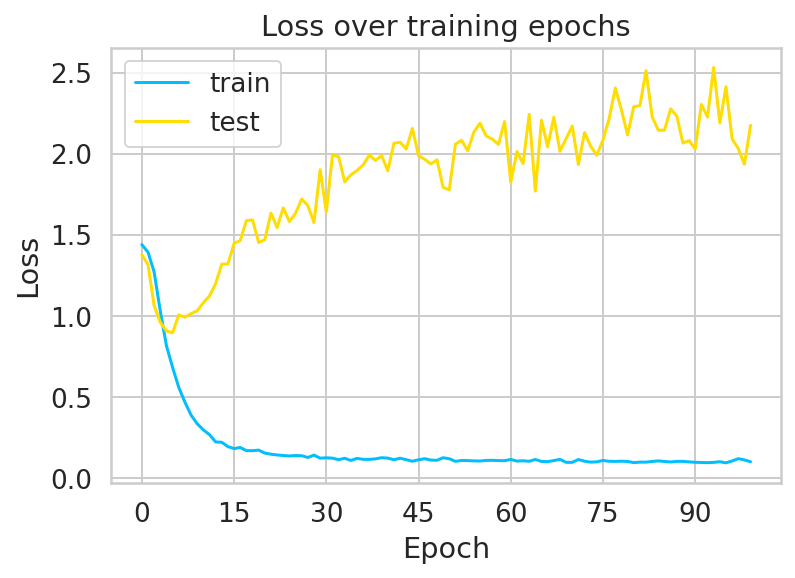

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

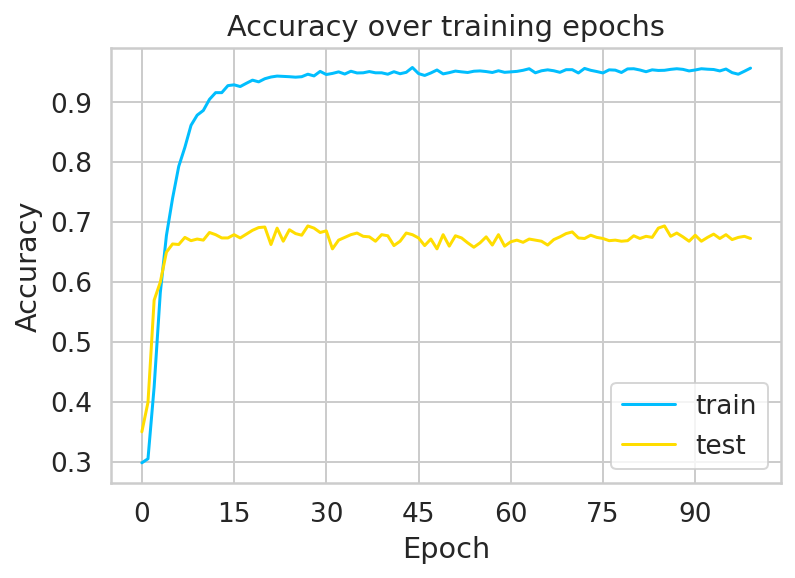

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [ ]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

35/35 [==============================] - 6s 175ms/step - loss: 2.1744 - acc: 0.6721
train acc 0.9583116173744202
test acc 0.6721311211585999


In [ ]:
y_pred = np.argmax(model.predict(data.test_x), axis=-1)
# y_pred = (y_pred > 0.5).astype(np.int)

In [ ]:
print(classification_report(data.test_y, y_pred, target_names=classes))

              precision    recall  f1-score   support

         neu       0.63      0.67      0.65       384
         ang       0.63      0.75      0.69       170
         sad       0.68      0.71      0.69       245
         exc       0.78      0.60      0.68       299

    accuracy                           0.67      1098
   macro avg       0.68      0.68      0.68      1098
weighted avg       0.68      0.67      0.67      1098



In [ ]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
print(cm) 
print(df_cm)

# Normalize CM
norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(norm_cm)

df_norm_cm = pd.DataFrame(norm_cm, index=classes, columns=classes)
print(df_norm_cm)

[[256  42  52  34]
 [ 29 128   7   6]
 [ 50   9 174  12]
 [ 73  23  23 180]]
     neu  ang  sad  exc
neu  256   42   52   34
ang   29  128    7    6
sad   50    9  174   12
exc   73   23   23  180
[[0.66666667 0.109375   0.13541667 0.08854167]
 [0.17058824 0.75294118 0.04117647 0.03529412]
 [0.20408163 0.03673469 0.71020408 0.04897959]
 [0.24414716 0.07692308 0.07692308 0.60200669]]
          neu       ang       sad       exc
neu  0.666667  0.109375  0.135417  0.088542
ang  0.170588  0.752941  0.041176  0.035294
sad  0.204082  0.036735  0.710204  0.048980
exc  0.244147  0.076923  0.076923  0.602007


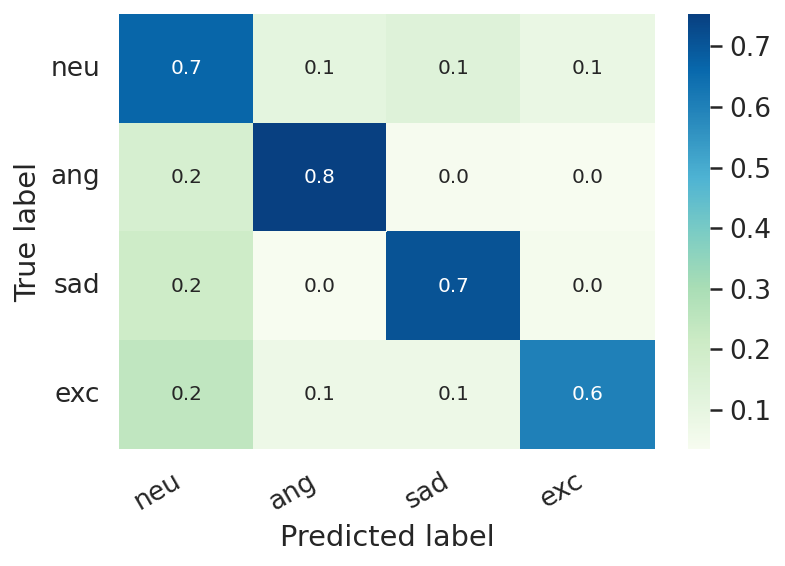

In [ ]:
hmap = sns.heatmap(df_norm_cm, annot=True, fmt="0.1f", cmap='GnBu')
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
sentences = [
  "What's your age?",
  "you are an awful individual"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = model.predict(pred_token_ids).argmax(axis=-1)

for text, label in zip(sentences, predictions):
  print("text:", text, "\nintent:", classes[label])
  print()

text: What's your age? 
intent: neu

text: you are an awful individual 
intent: ang

